In [5]:
df <- read.csv("/kaggle/input/nike-global-sales-data-2024/nike_sales_2024.csv")

In [53]:
head(df, 10)

,Month,Region,Main_Category,Sub_Category,Product_Line,Price_Tier,Units_Sold,Revenue_USD,Online_Sales_Percentage,Retail_Price
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<int>
1,November,India,Equipment,Bags,Gym Sack,Budget,48356,14506800,73,300
2,January,India,Equipment,Accessories,Hats,Budget,9842,2066820,50,210
3,October,India,Apparel,Tops,Tech Fleece,Mid-Range,25079,1755530,90,70
4,December,Greater China,Footwear,Cricket,Vapor Cricket,Premium,41404,8694840,58,210
5,May,Greater China,Equipment,Socks,Performance Socks,Premium,33569,5371040,53,160
6,October,Japan,Apparel,Performance,Dri-FIT,Premium,39344,5508160,73,140
7,December,Japan,Footwear,Cricket,Vapor Cricket,Budget,30197,6945310,50,230
8,July,Greater China,Apparel,Tops,Therma-FIT,Mid-Range,42814,6422100,55,150
9,April,Greater China,Footwear,Cricket,Vapor Cricket,Mid-Range,16489,2473350,78,150


In [17]:
# Install required packages
if (!require("ggplot2")) install.packages("ggplot2")
if (!require("dplyr")) install.packages("dplyr")

# Load libraries
library(ggplot2)
library(dplyr)

In [18]:
# Aggregate revenue by month
monthly_revenue <- df %>%
  group_by(Month) %>%
  summarise(Total_Revenue = sum(Revenue_USD)) %>%
  arrange(factor(Month, levels = month.name))

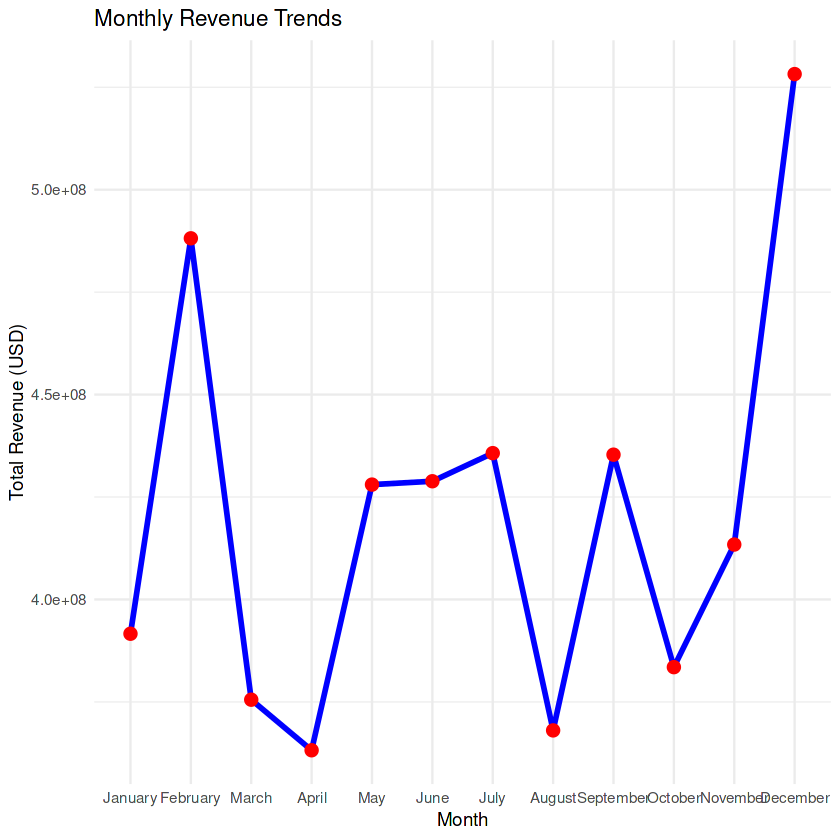

In [26]:
ggplot(monthly_revenue, aes(x = factor(Month, levels = month.name), y = Total_Revenue)) +
  geom_line(group = 1, color = "blue", linewidth = 1.2) +
  geom_point(color = "red", size = 3) +
  labs(title = "Monthly Revenue Trends", x = "Month", y = "Total Revenue (USD)") +
  theme_minimal()

In [27]:
# Aggregate units sold by main category
category_sales <- df %>%
  group_by(Main_Category) %>%
  summarise(Total_Units = sum(Units_Sold))

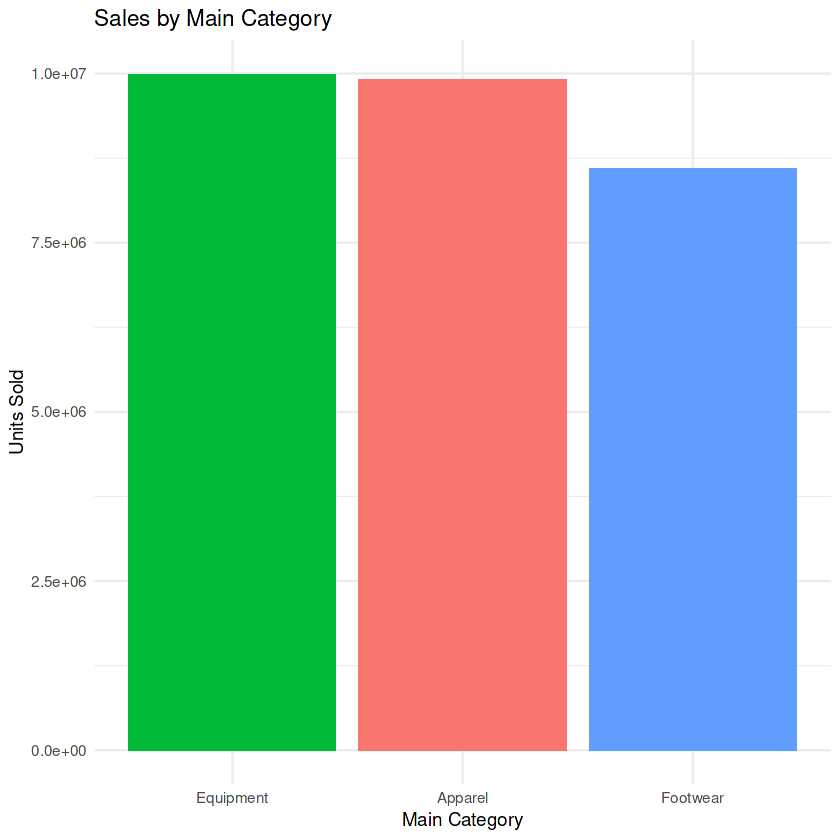

In [28]:
# Bar plot for main categories
ggplot(category_sales, aes(x = reorder(Main_Category, -Total_Units), y = Total_Units, fill = Main_Category)) +
  geom_bar(stat = "identity") +
  labs(title = "Sales by Main Category", x = "Main Category", y = "Units Sold") +
  theme_minimal() +
  theme(legend.position = "none")

In [29]:
# Aggregate revenue by price tier
price_tier_revenue <- df %>%
  group_by(Price_Tier) %>%
  summarise(Total_Revenue = sum(Revenue_USD))

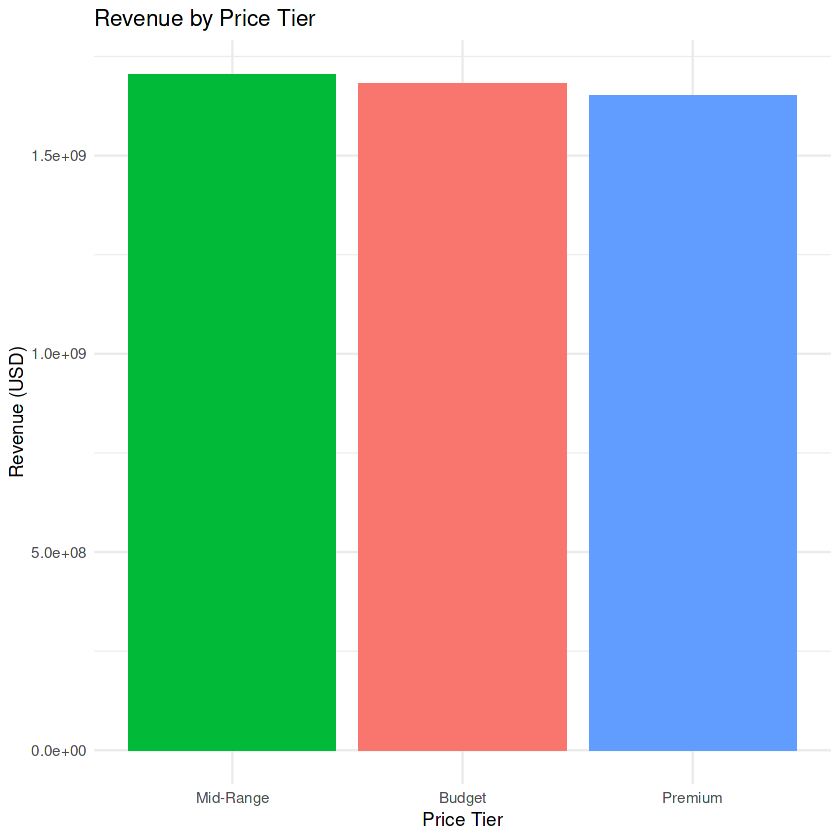

In [30]:
# Bar plot for revenue by price tier
ggplot(price_tier_revenue, aes(x = reorder(Price_Tier, -Total_Revenue), y = Total_Revenue, fill = Price_Tier)) +
  geom_bar(stat = "identity") +
  labs(title = "Revenue by Price Tier", x = "Price Tier", y = "Revenue (USD)") +
  theme_minimal() +
  theme(legend.position = "none")

In [32]:
# Aggregate units sold by product line
top_products <- df %>%
  group_by(Product_Line) %>%
  summarise(Total_Units = sum(Units_Sold)) %>%
  arrange(desc(Total_Units)) %>%
  slice(1:10) # Top 10 products

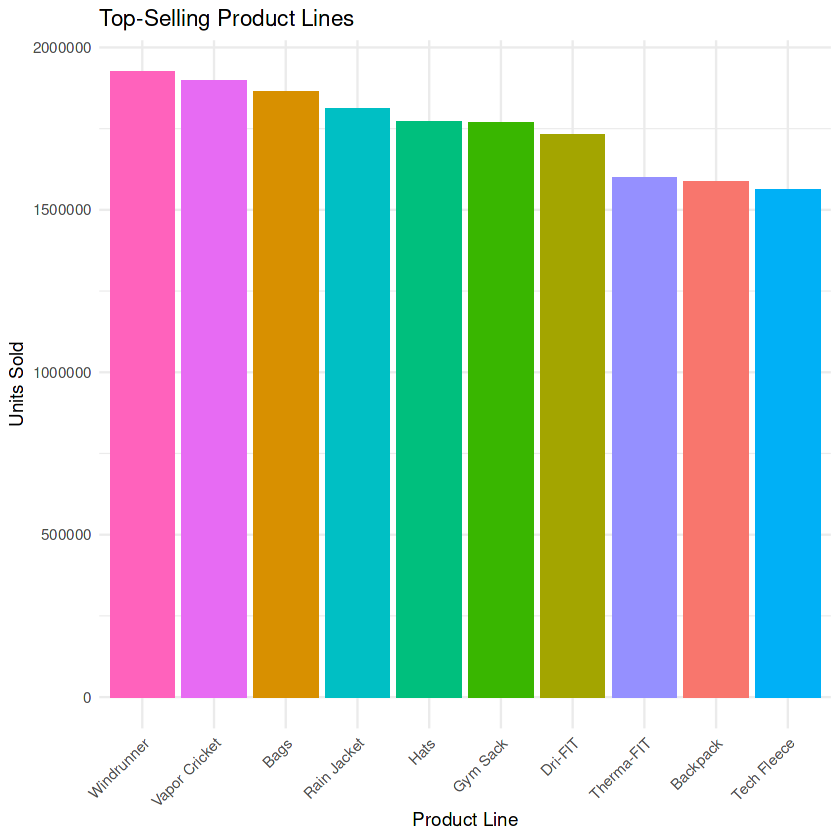

In [33]:
# Bar plot for top-selling products
ggplot(top_products, aes(x = reorder(Product_Line, -Total_Units), y = Total_Units, fill = Product_Line)) +
  geom_bar(stat = "identity") +
  labs(title = "Top-Selling Product Lines", x = "Product Line", y = "Units Sold") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1), legend.position = "none")

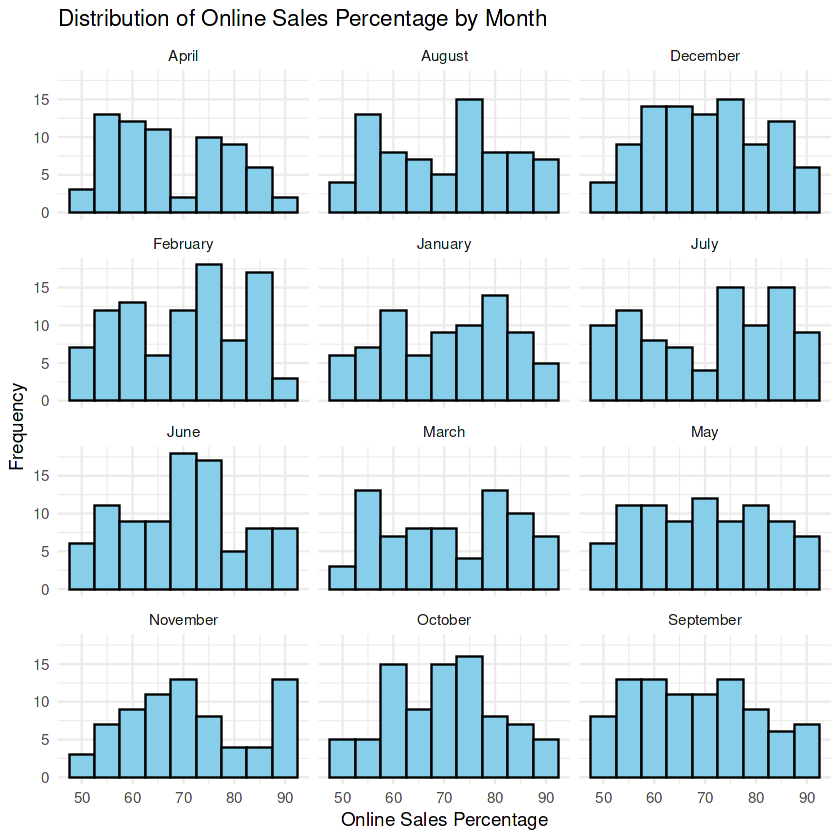

In [39]:
ggplot(df, aes(x = Online_Sales_Percentage)) +
  geom_histogram(binwidth = 5, fill = "skyblue", color = "black") +
  labs(title = "Distribution of Online Sales Percentage by Month", 
       x = "Online Sales Percentage", y = "Frequency") +
  theme_minimal() +
  facet_wrap(~Month, ncol = 3)  # Create facets for each month


In [45]:
monthly_online_sales <- df %>%
  group_by(Month) %>%
  summarise(Total_Online_Sales = sum(Online_Sales_Percentage, na.rm = TRUE))

In [51]:
monthly_online_sales

Month,Total_Online_Sales
<chr>,<int>
April,4583
August,5274
December,6750
February,6748
January,5515
July,6380
June,6355
March,5184
May,5945


In [42]:
monthly_online_revenue <- df %>%
  group_by(Month) %>%
  summarise(Total_Online_Revenue = sum((Online_Sales_Percentage / 100) * Revenue_USD, na.rm = TRUE))

In [52]:
monthly_online_revenue

Month,Total_Online_Revenue
<chr>,<dbl>
April,239429951
August,258024586
December,360184073
February,344312073
January,284983936
July,310327549
June,298459404
March,259802231
May,297145080


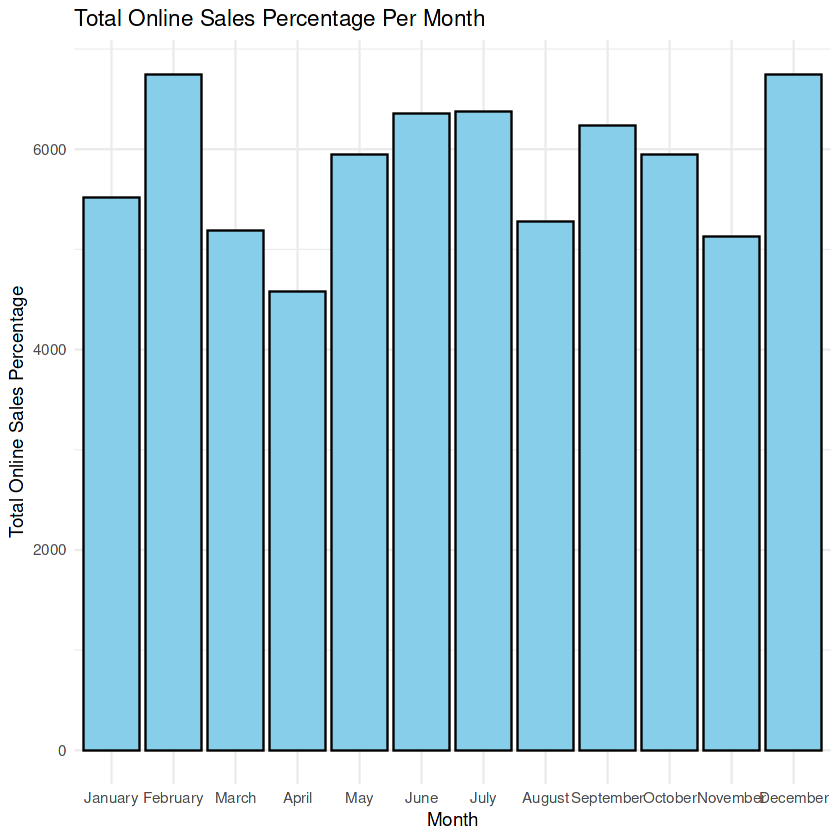

In [49]:
# Bar plot for total online sales percentage per month
ggplot(monthly_online_sales, aes(x = factor(Month, levels = month.name), y = Total_Online_Sales)) +
  geom_bar(stat = "identity", fill = "skyblue", color = "black") +
  labs(title = "Total Online Sales Percentage Per Month", x = "Month", y = "Total Online Sales Percentage") +
  theme_minimal()

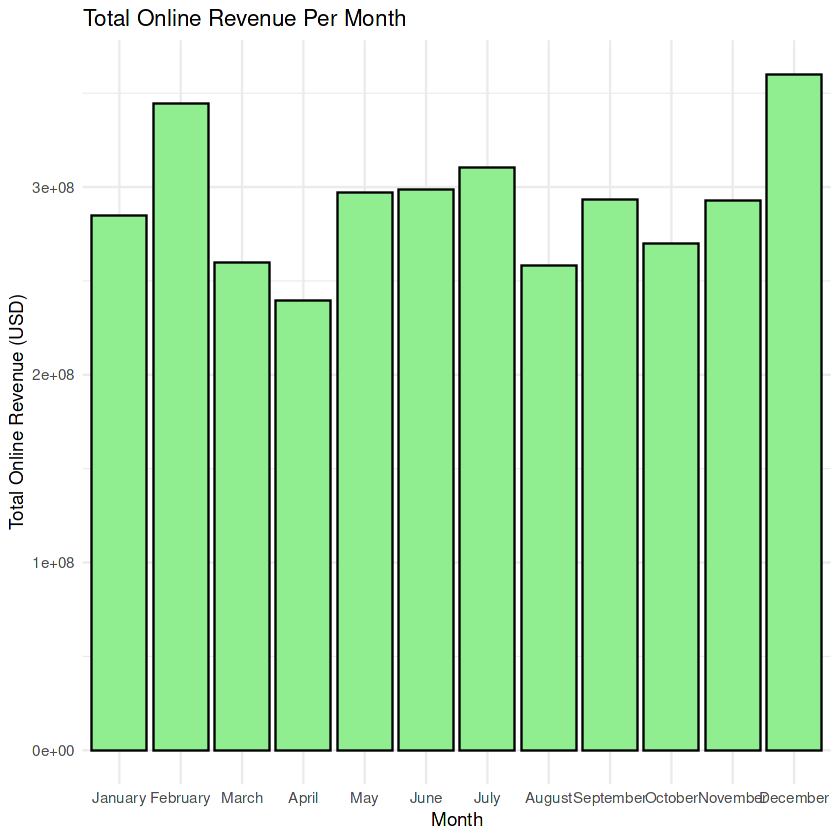

In [50]:
# Bar plot for total online revenue per month
ggplot(monthly_online_revenue, aes(x = factor(Month, levels = month.name), y = Total_Online_Revenue)) +
  geom_bar(stat = "identity", fill = "lightgreen", color = "black") +
  labs(title = "Total Online Revenue Per Month", x = "Month", y = "Total Online Revenue (USD)") +
  theme_minimal()